# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

fatal: destination path 'machine_learning_1' already exists and is not an empty directory.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

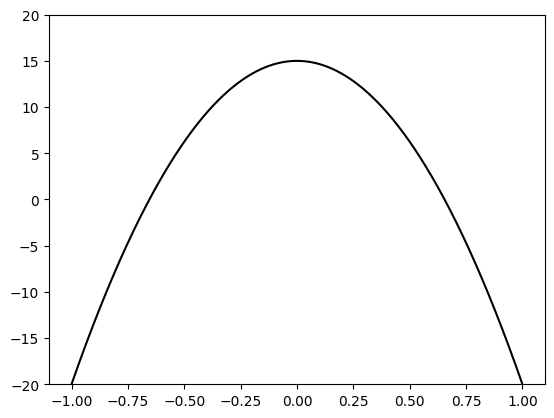

In [3]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [5]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

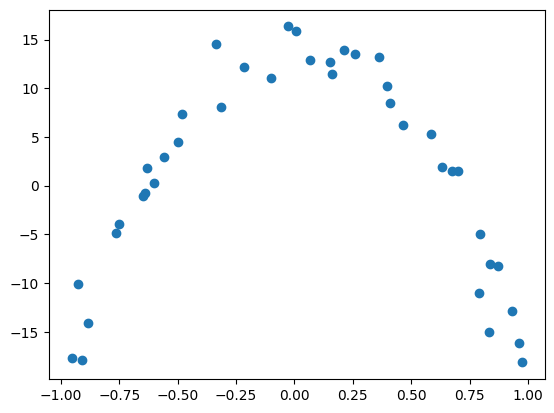

In [6]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [7]:
for datasample in zip(X,Y):
    print(datasample)
X = X.reshape(-1,1)
print(X)

(0.7963462427157579, -4.987021692199473)
(-0.21740789953075024, 12.186494719897935)
(0.4105667997088125, 8.51416927556333)
(0.6989719303727342, 1.5074515503972998)
(0.7900779348533504, -10.981245193989203)
(0.15939002149121184, 11.49489831282274)
(-0.09887378673768965, 11.083923326370371)
(0.8338824358949122, -14.98842561565315)
(0.5866501682604484, 5.348645335503234)
(-0.027111596061666354, 16.33736440541925)
(0.2602946808229456, 13.468136581792084)
(0.46297844158169554, 6.263787056401539)
(-0.765731413582964, -4.865413486859145)
(-0.3349277015606891, 14.571036079808291)
(0.631826193067319, 1.935578622920234)
(0.3953412803824776, 10.194498032910282)
(-0.9095318642687753, -17.878582370333618)
(0.06839593652144793, 12.871533693282515)
(0.361178265124513, 13.233922750329933)
(0.21267683550843786, 13.890972539019417)
(0.15190589606308147, 12.701365741671829)
(0.9610333012945373, -16.11098183885502)
(-0.9272159247770284, -10.042445117093663)
(-0.6300561172051233, 1.796552020552261)
(-0.752

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [8]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_poly=addPoly(X,200)

In [9]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[7.96346243e-01 6.34167338e-01 5.05016777e-01 4.02168213e-01
 3.20265145e-01 2.55041945e-01 2.03101695e-01 1.61739272e-01
 1.28800461e-01 1.02569763e-01 8.16810456e-02 6.50463938e-02
 5.17994513e-02 4.12502984e-02 3.28495202e-02 2.61595919e-02
 2.08320928e-02 1.65895588e-02 1.32110328e-02 1.05205563e-02
 8.37800552e-03 6.67179321e-03 5.31305746e-03 4.23103334e-03
 3.36936751e-03 2.68318315e-03 2.13674282e-03 1.70158712e-03
 1.35505251e-03 1.07909097e-03 8.59330043e-04 6.84324251e-04
 5.44959046e-04 4.33976089e-04 3.45595228e-04 2.75213461e-04
 2.19165206e-04 1.74531388e-04 1.38987415e-04 1.10682106e-04
 8.81412791e-05 7.01909764e-05 5.58963204e-05 4.45128247e-05
 3.54476207e-05 2.82285796e-05 2.24797233e-05 1.79016432e-05
 1.42559063e-05 1.13526374e-05 9.04063014e-06 7.19947184e-06
 5.73327235e-06 4.56566989e-06 3.63585407e-06 2.89539872e-06
 2.30573990e-06 1.83616730e-06 1.46222493e-06 1.16443733e-06
 9.27295293e-07 7.38448123e-07 5.88060388e-07 4.68299680e-07
 3.72928691e-0

## Splitting data into training and testing

In [10]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2)

In [11]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [12]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data
model_no_reg = LinearRegression().fit(X_train,y_train)

Training error (rmse): 4.804155174880296e-05
Testing error (rmse): 479335342.8761044


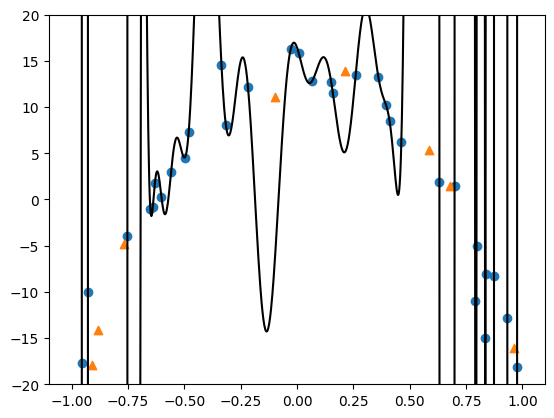

Polynomial coefficients
[16.467451682059767, -67.77219757370756, -1807.5852814820014, 35240.07146848497, 57062.10678442316, -2277222.6852013986, -182295.91640475308, 61866922.16517448, -14605995.085623153, -901582299.7019981, 253058585.3373315, 7798731924.248269, -1846784780.7032015, -41716374650.96149, 6741831524.359742, 137287629865.18237, -10884838204.963676, -258837303744.6357, -125016569.36147165, 209129011359.82666, 18982336363.68518, 76372396191.25395, -5780575863.997871, -159157680708.55966, -17446984991.926117, -106441815641.67433, -3981747036.7351937, 60122531752.42257, 11311013145.667377, 131303150447.96918, 12437478209.439653, 80774994393.71591, 1834466081.9800396, -14673689452.666958, -9275281103.135494, -83300393422.7317, -12184179787.563889, -98659105639.56502, -5432811488.710145, -70570004553.0222, 6687809176.007111, -22917834105.681114, 18003423071.247246, 22660045105.00223, 23745132403.885017, 53481636441.486824, 21989609780.795277, 65850668534.656715, 13514694109.892

In [13]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [14]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg = linear_model.Lasso().fit(X_train,y_train)

Training error (rmse): 4.067228344695488
Testing error (rmse): 5.183838617355228


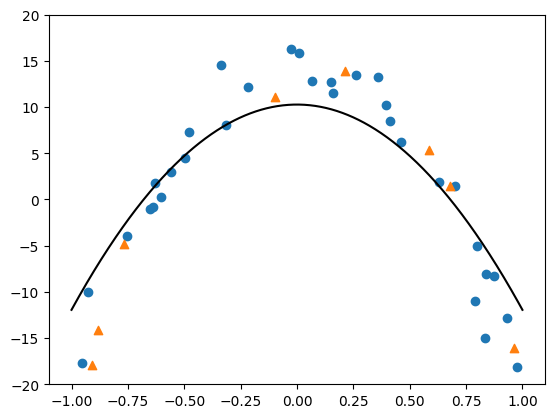

Polynomial coefficients
[10.272481817320198, -0.0, -22.216433724237465, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0

In [15]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [16]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg = linear_model.Ridge().fit(X_train,y_train)

Training error (rmse): 3.2726785886251295
Testing error (rmse): 3.872195643990441


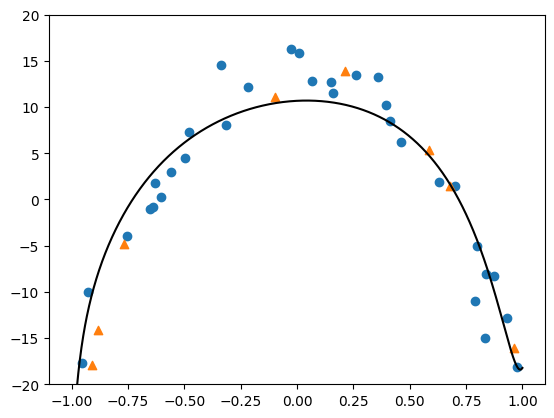

Polynomial coefficients
[10.678072980578277, 1.2387998340584119, -14.42084331146431, -1.7515363756250246, -8.244809376837207, -1.7218513290235435, -4.538453308631167, -1.1157946009930404, -2.506461451641316, -0.5165618552878204, -1.3772353363481327, -0.06054825299397115, -0.7398782644706992, 0.24846773920079013, -0.3798444616876916, 0.4406358585044884, -0.1803484368435173, 0.5486953405838685, -0.07499181893179607, 0.5994151683244783, -0.024768033082539387, 0.6125492426413753, -0.006290072716731765, 0.6019575823021368, -0.005406444952839734, 0.5770783574088019, -0.013562934510966296, 0.5442032742233521, -0.025648406525212414, 0.5074489847251327, -0.03868407946072719, 0.46945520919903894, -0.051011429378314294, 0.4318713180251289, -0.06178349418685469, 0.3956894902090421, -0.07064453954955752, 0.3614702722947057, -0.07752824391150889, 0.32949409386472095, -0.08253107973671558, 0.2998624115180439, -0.08583361297829456, 0.27256483659975506, -0.08765237029319527, 0.2475234085735652, -0.0882

In [17]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [18]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.765731,-4.865413,3.788433e+04,-2.754004,-1.478387
1,-0.883898,-14.073180,1.103744e+08,-7.084682,-8.121676
2,0.676653,1.492967,-1.786482e+03,0.100477,1.731500
3,-0.098874,11.083923,-6.842498e+00,10.055293,10.415527
4,0.586650,5.348645,1.556127e+03,2.626509,4.733001
5,0.212677,13.890973,5.126218e+00,9.267601,10.254342
6,0.961033,-16.110982,1.341374e+09,-10.246283,-17.223051
7,-0.909532,-17.878582,1.631914e+08,-8.106023,-10.281583


### Real Example (Predict fuel efficiency)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [21]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [22]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [23]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3062.8548221856595


##### lasso regularization

In [24]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [25]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920175
